# Machine Learning Using Decision Tree: AllLife Bank Personal Loan Campaign

#### **Demo Project:** To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
    confusion_matrix
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
df = pd.read_csv("Loan_Modelling.csv")
data = df.copy()  # to make a copy of the original dataframe

## Data Overview

* Observations
* Sanity checks

### View the first and last 5 rows of the dataset.

In [3]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [4]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80000,1,0,0,0,0,1,1


#### Observations
* The ID column is containing unique values.
* The Online and CreditCard column contains only two unique value (0 and 1)

### Understanding the shape of the dataset.

In [5]:
data.shape
rows, cols = data.shape   #assigning a variable to the result
print(f'There are {rows} rows and {cols} columns in the dataset')

There are 5000 rows and 14 columns in the dataset


### Check the data types of the columns for the dataset.

In [6]:
data.info()
print('-'*60)  #Print a line to separate the information
print('The unique datatypes of the different columns in the datasets are\n1: int64\n2: float64\n3: object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
--------------------------------------------------------

#### Observations
* All the columns have 5000 rows, which can be inferred that there are no null values present in the dataset.
* There are three unique datatypes in the dataset.




### Checking for missing values

In [7]:
# Double Checking if there are any missing value
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no missing values in the data

### Dropping the duplicate values

In [8]:
# checking for duplicate values
data.duplicated().sum()

0

* There are no duplicate values in the data.

In [9]:
#to view the unique value in each fields
data.nunique() 

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

#### Dropping the columns with all unique values

In [10]:
data.ID.nunique()

5000

* The ID column contains only unique values, so we can drop it

In [11]:
data.drop("ID", axis=1, inplace=True)

### Statistical summary of the data

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.00000,45.33840,11.46317,23.00000,35.00000,45.00000,55.00000,67.00000
Experience,5000.00000,20.10460,11.46795,-3.00000,10.00000,20.00000,30.00000,43.00000
Income,5000.00000,73.77420,46.03373,8.00000,39.00000,64.00000,98.00000,224.00000
ZIPCode,5000.00000,93169.25700,1759.45509,90005.00000,91911.00000,93437.00000,94608.00000,96651.00000
Family,5000.00000,2.39640,1.14766,1.00000,1.00000,2.00000,3.00000,4.00000
CCAvg,5000.00000,1.93794,1.74766,0.00000,0.70000,1.50000,2.50000,10.00000
Education,5000.00000,1.88100,0.83987,1.00000,1.00000,2.00000,3.00000,3.00000
Mortgage,5000.00000,56.49880,101.71380,0.00000,0.00000,0.00000,101.00000,635.00000
Personal_Loan,5000.00000,0.09600,0.29462,0.00000,0.00000,0.00000,0.00000,1.00000
Securities_Account,5000.00000,0.10440,0.30581,0.00000,0.00000,0.00000,0.00000,1.00000


#### Observations
* Experience: The experience field has a min value of -3 and 43 as the max value. The negative (-3) value is unusual. I will replace the negative values with zero (0) which means no experience.
* Age: Average age of people in the dataset is around 45 years, age has a wide range from 23 to 67 years.
* Income: There is a vast difference in 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* Mortgage: There's a huge difference in the 75th percentile and maximum value of mortgage indicating the presence of outliers. Also, 75% of the observations are 0.

## Data Preprocessing

#### Checing for Anomalous Values

In [13]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [14]:
# checking for experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3], dtype=int64)

In [15]:

# Updated experience with negative value to zero because Work Experience cannot be negative
data['Experience'] = data['Experience'].replace(-2, 0).replace(-3, 0).replace(-1, 0) #Replace the negative values with 0
print(data['Experience'].unique())

[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22  0 34 38 40 33  4 42 43]


#### Feature Engineering

In [16]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

In [17]:
data["ZIPCode"] = data["ZIPCode"].astype(str)

print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   int64   
 10  CD_Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
dtypes: category(1), float64(1), int64(11)
memory usage: 474.1 KB


In [19]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91,4,1.60000,1,0,0,1,0,0,0
1,45,19,34,90,3,1.50000,1,0,0,1,0,0,0
2,39,15,11,94,1,1.00000,1,0,0,0,0,0,0
3,35,9,100,94,1,2.70000,2,0,0,0,0,0,0
4,35,8,45,91,4,1.00000,2,0,0,0,0,0,1


In [20]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

## Exploratory Data Analysis.

In [21]:
# function to create histogram and boxplot


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [23]:
# function to create stacked barplot


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [24]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

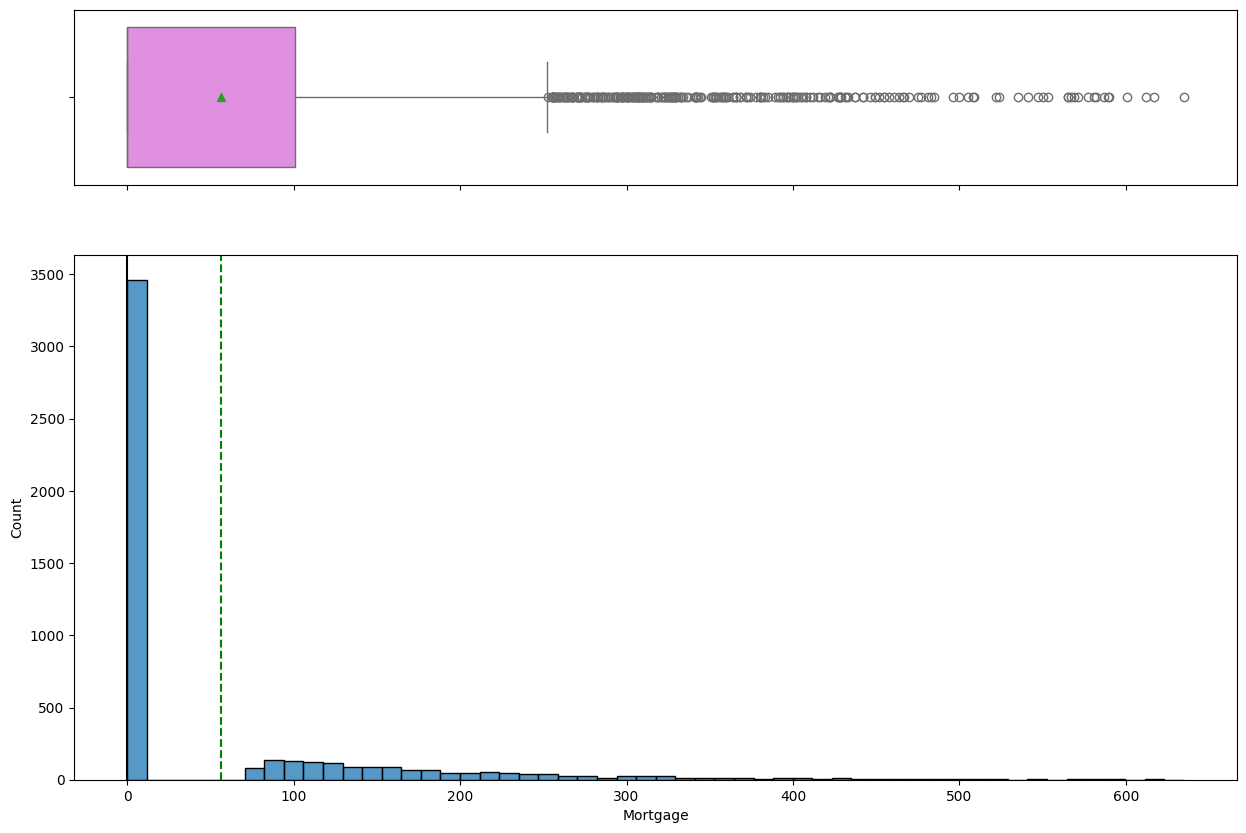

In [25]:
histogram_boxplot(data, "Mortgage")

#### Observations
* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values.
* 75% of the mortgage data have 0 values indicatings the customers does not have house mortgage payment.
* Mortgage have a heavily right skewed distribution.

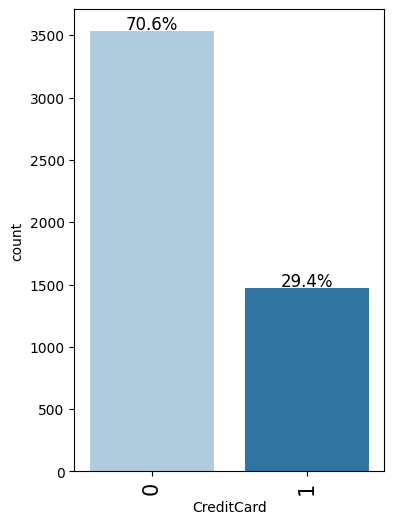

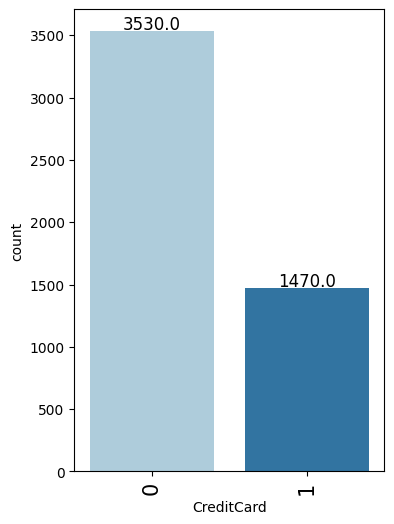

In [26]:
labeled_barplot(data, "CreditCard", perc=True)
labeled_barplot(data, "CreditCard")

* 29.4% customers uses a credit card issued by any other bank(Excluding AllLife Bank)
* 1470 Customers have credit cards

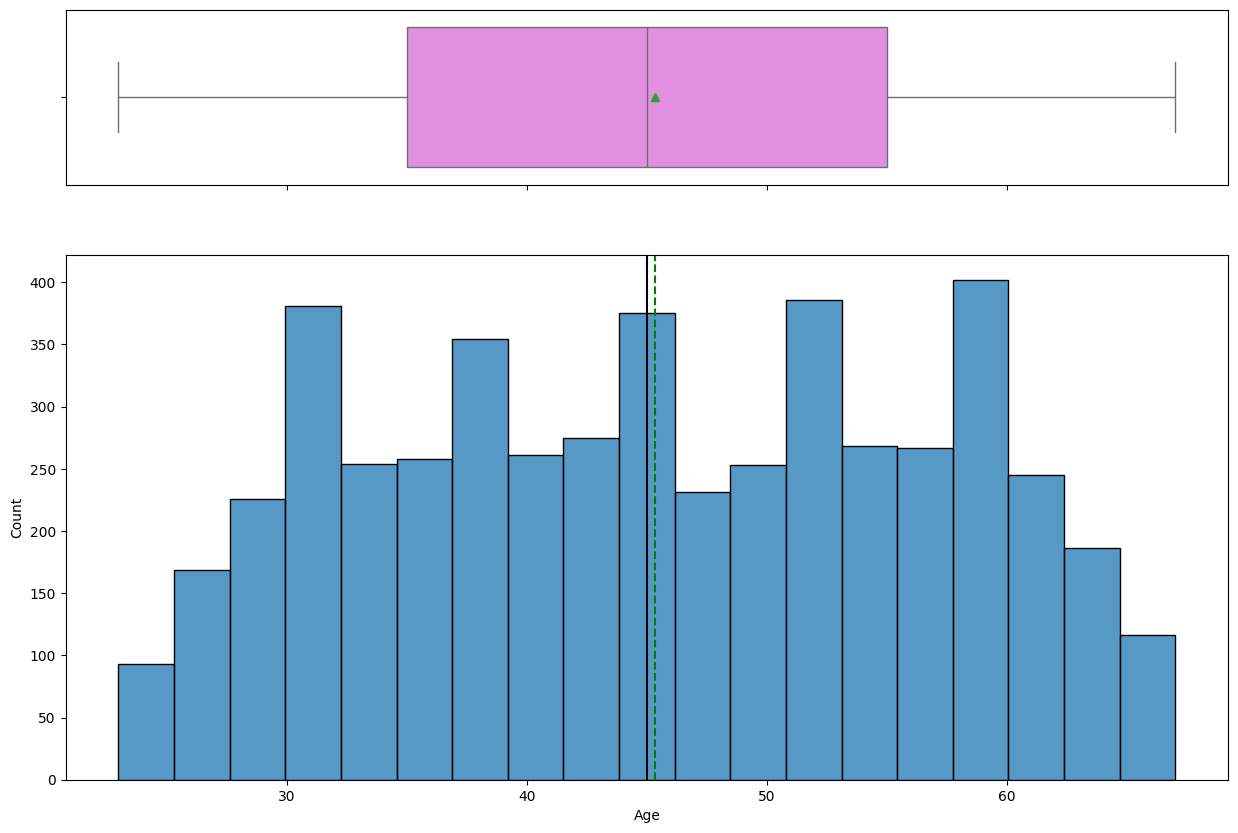

In [27]:
histogram_boxplot(data, "Age")

* The Age distribution looks normal with a mean age of 45 years
* There are no outlier present

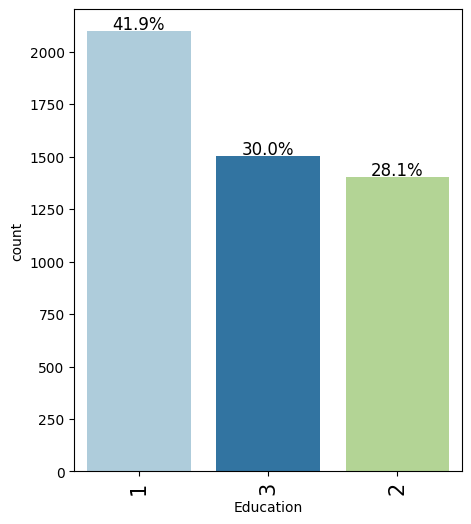

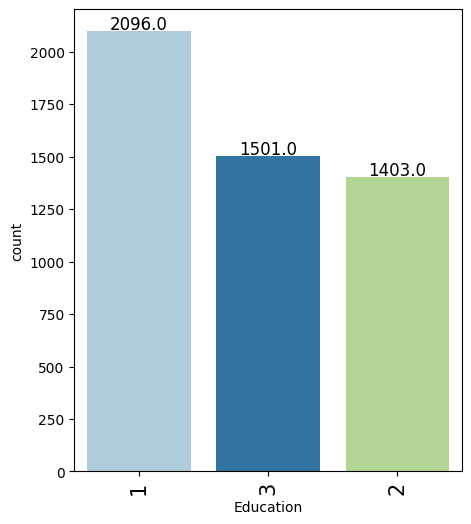

In [28]:
labeled_barplot(data, "Education", perc=True)
labeled_barplot(data, "Education")

* Majority of the customers are Undergrad, followed by Advanced/Professional people, then Graduate.

### Bivariate Analysis

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


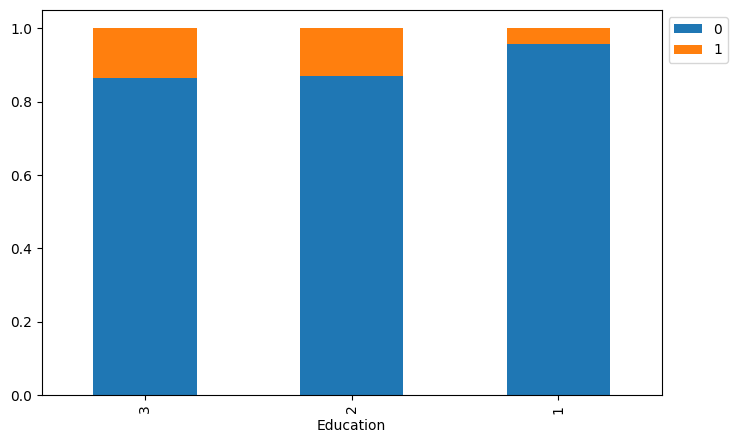

In [29]:
stacked_barplot(data, "Education",  "Personal_Loan")

* Around 43% of the purchased loans were from people with Advanced/Professional Education.
* Undergrads are less likely to purchase personal Loans.

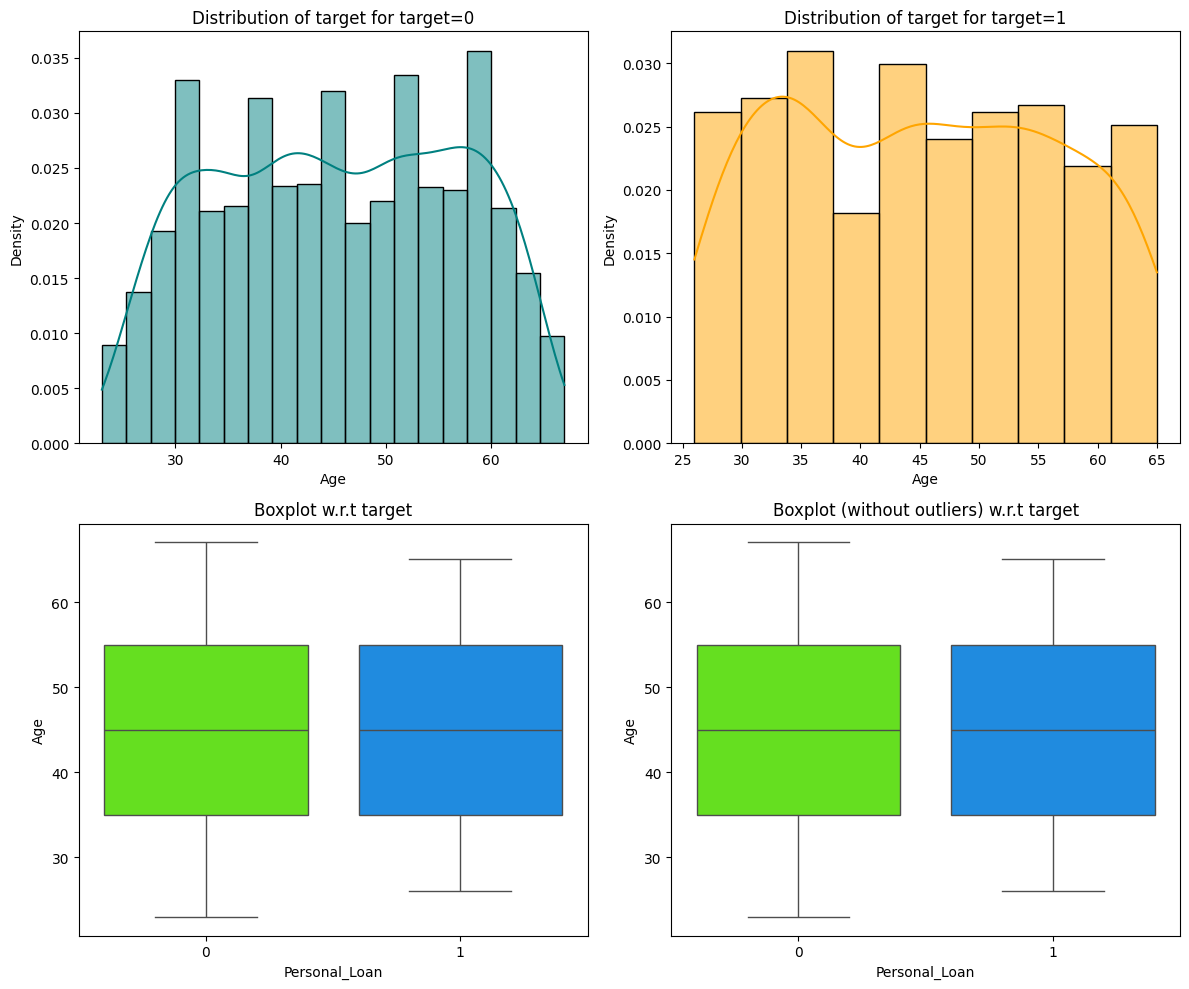

In [30]:
distribution_plot_wrt_target(data, "Age",  "Personal_Loan")

* Customers who purchased personal loans and those who do not purchase have the same average age of around 48 years.

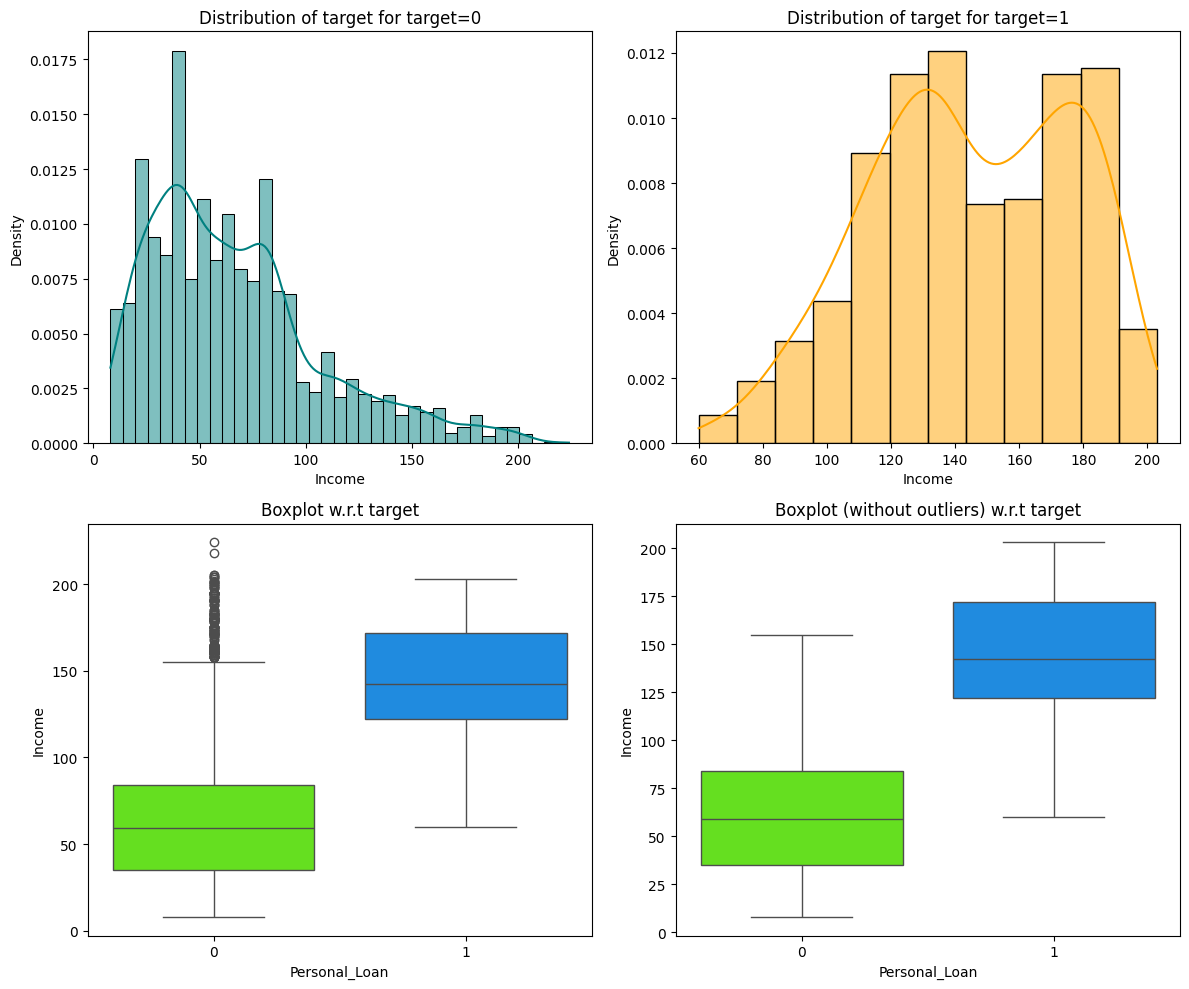

In [31]:
distribution_plot_wrt_target(data, "Income",  "Personal_Loan")

* Majority of the customers that purchased personal loans make an average of 140k income
* Customers who do not purchase personal loans have an average of around 55k income

### MultiVariate Analysis

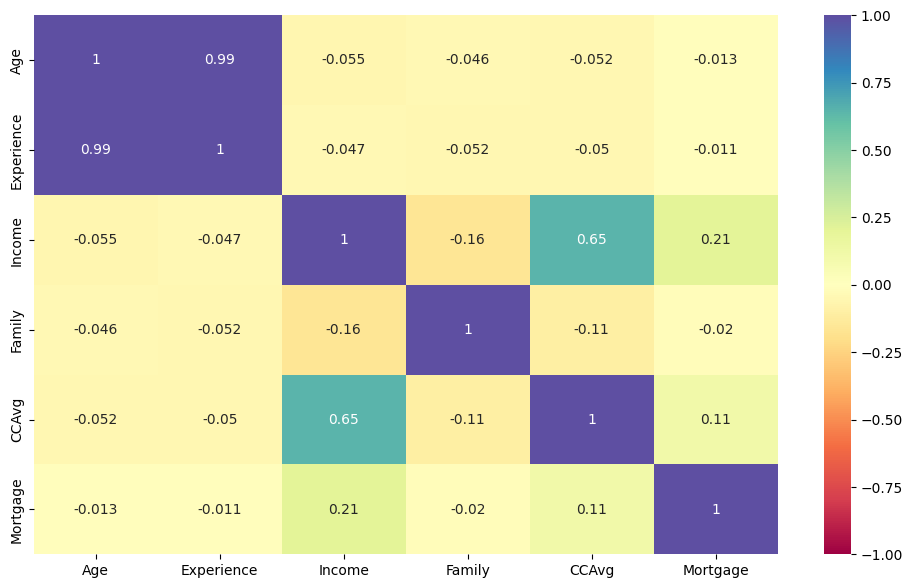

In [32]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
#cols_list.remove('Personal_Loan')

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral"
)
plt.show()

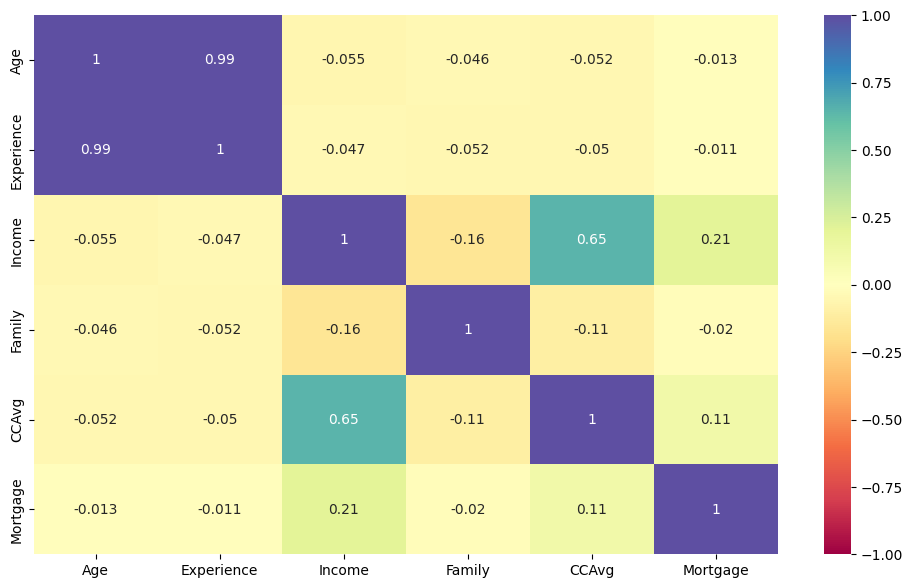

In [33]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral"
)
plt.show()

* Income attribute has the strongest correlation with the target attribute (personal loan)
* Age and Experience shows the strongest positive correlation overall in the data.
* Income and CCAvg also shows a strong positive correlation

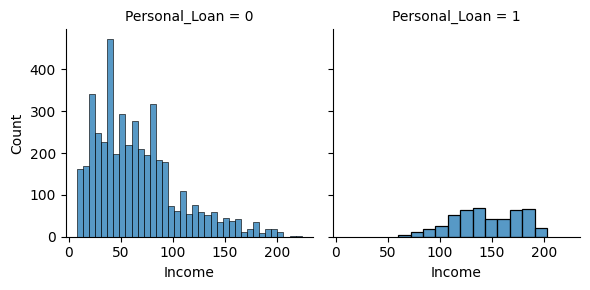

In [34]:
g = sns.FacetGrid(data, col="Personal_Loan")
g.map(sns.histplot, "Income");

* The Income of customers that did not purchase loan has a positively skewed distribution, While customers that purchased the loan is negatively skewed.
* The Income field has outliers

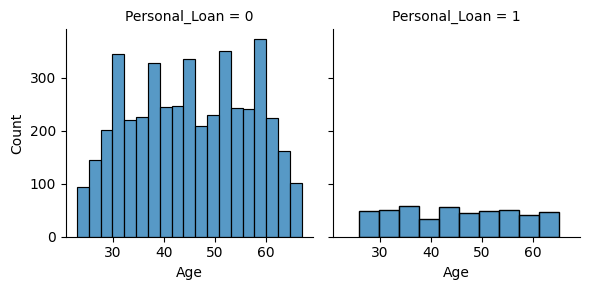

In [35]:
g = sns.FacetGrid(data, col="Personal_Loan")
g.map(sns.histplot, "Age");

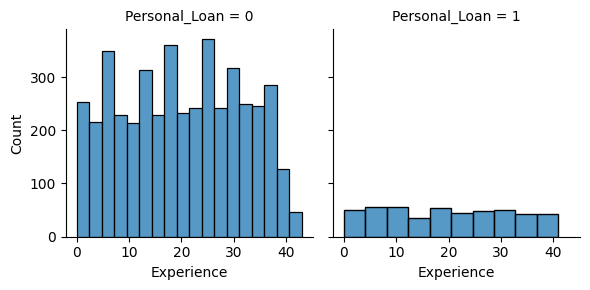

In [36]:
g = sns.FacetGrid(data, col="Personal_Loan")
g.map(sns.histplot, "Experience");

* Age and Experience are highly correlated, hence the similar graph, so we might need to drop one of them before we train our model.

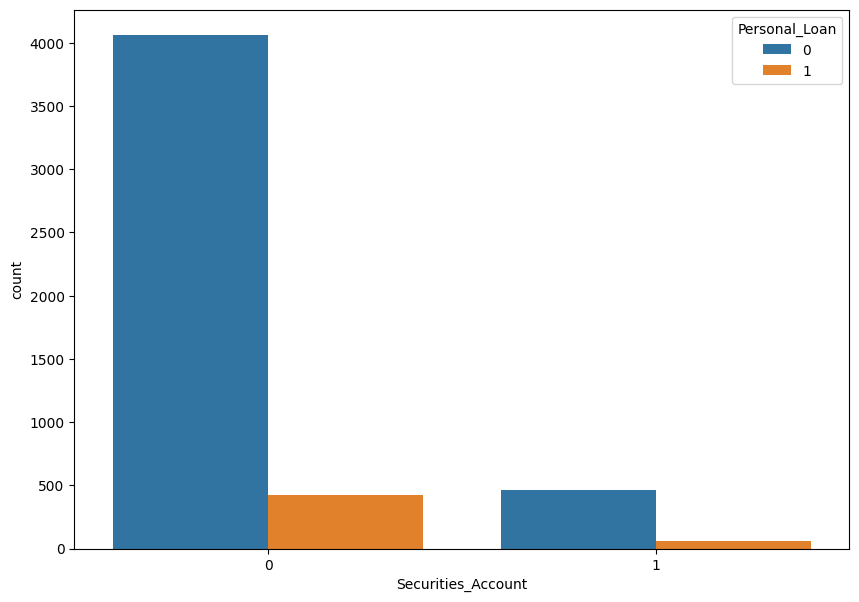

In [37]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Securities_Account', hue='Personal_Loan');

* Around 11% of customers with Securities_Account purchased personal loans
* Around 9% of customers without Securities_Account purchased personal loans

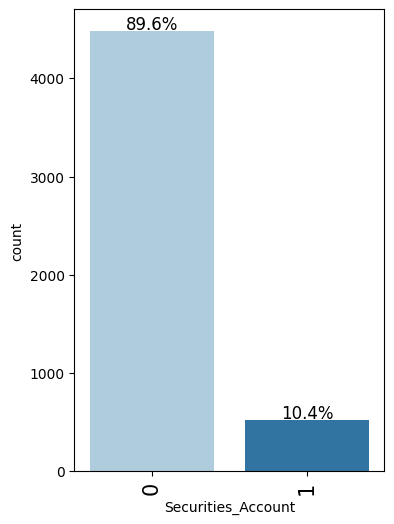

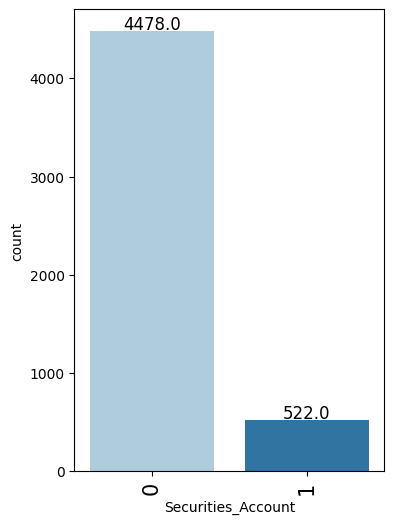

In [38]:
labeled_barplot(data, "Securities_Account", perc=True)
labeled_barplot(data, "Securities_Account")

* 89 % of bank customer do not have Securities account with the banks.

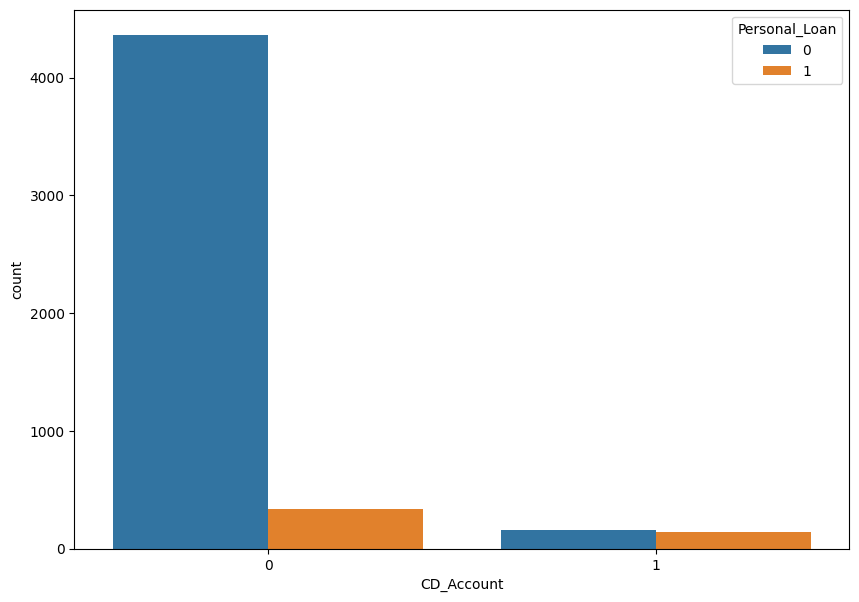

In [39]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='CD_Account', hue='Personal_Loan');

* Around 46% of the customers with certificate of deposit (CD) Account with the bank purchased personal loans 
* Around 7% of customers without CD_Account purchased personal loans

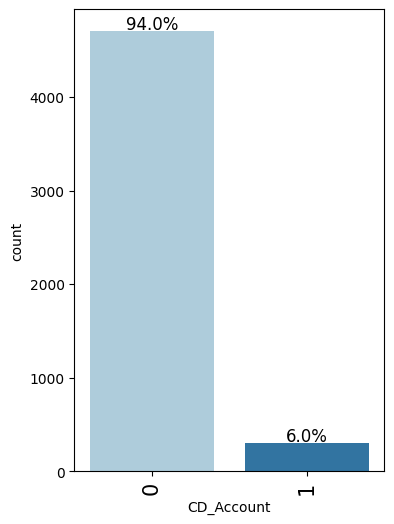

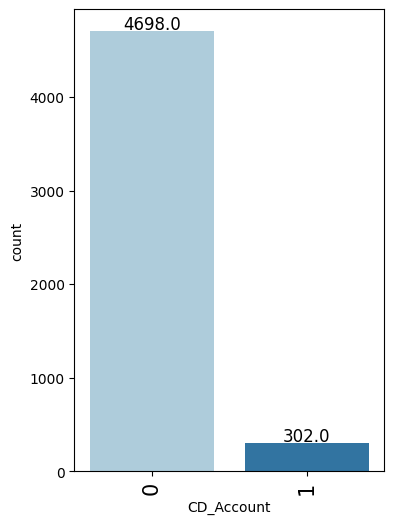

In [40]:
labeled_barplot(data, "CD_Account", perc=True)
labeled_barplot(data, "CD_Account")

* 94 % of bank customer do not have certificate of deposit (CD) Account with the bank

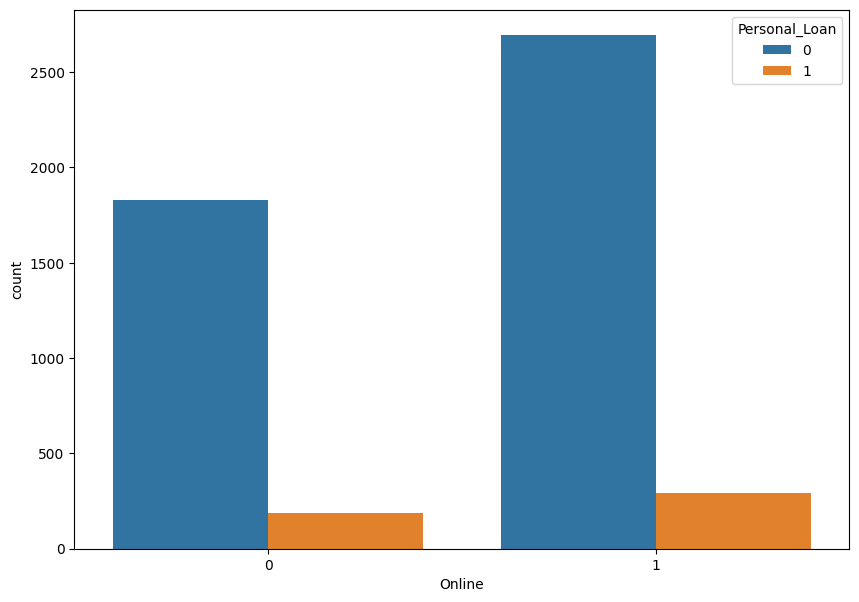

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Online', hue='Personal_Loan');

* Around 10% of the customers that uses internet banking facilities purchased personal loans 
* Around 9% of customers without internet banking facilities purchased personal loans 

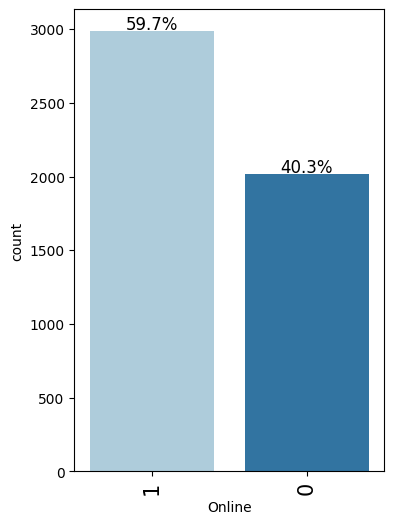

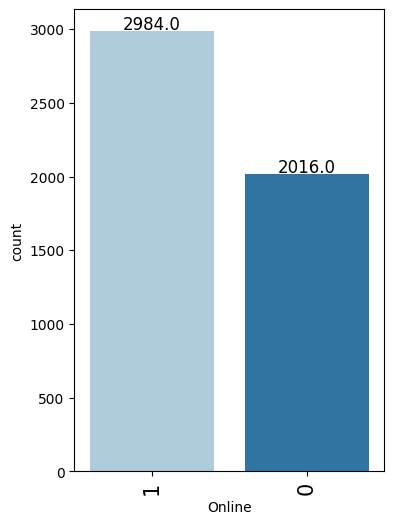

In [42]:
labeled_barplot(data, "Online", perc=True)
labeled_barplot(data, "Online")

* Around 60 % of bank customer do not use internet banking facilities 

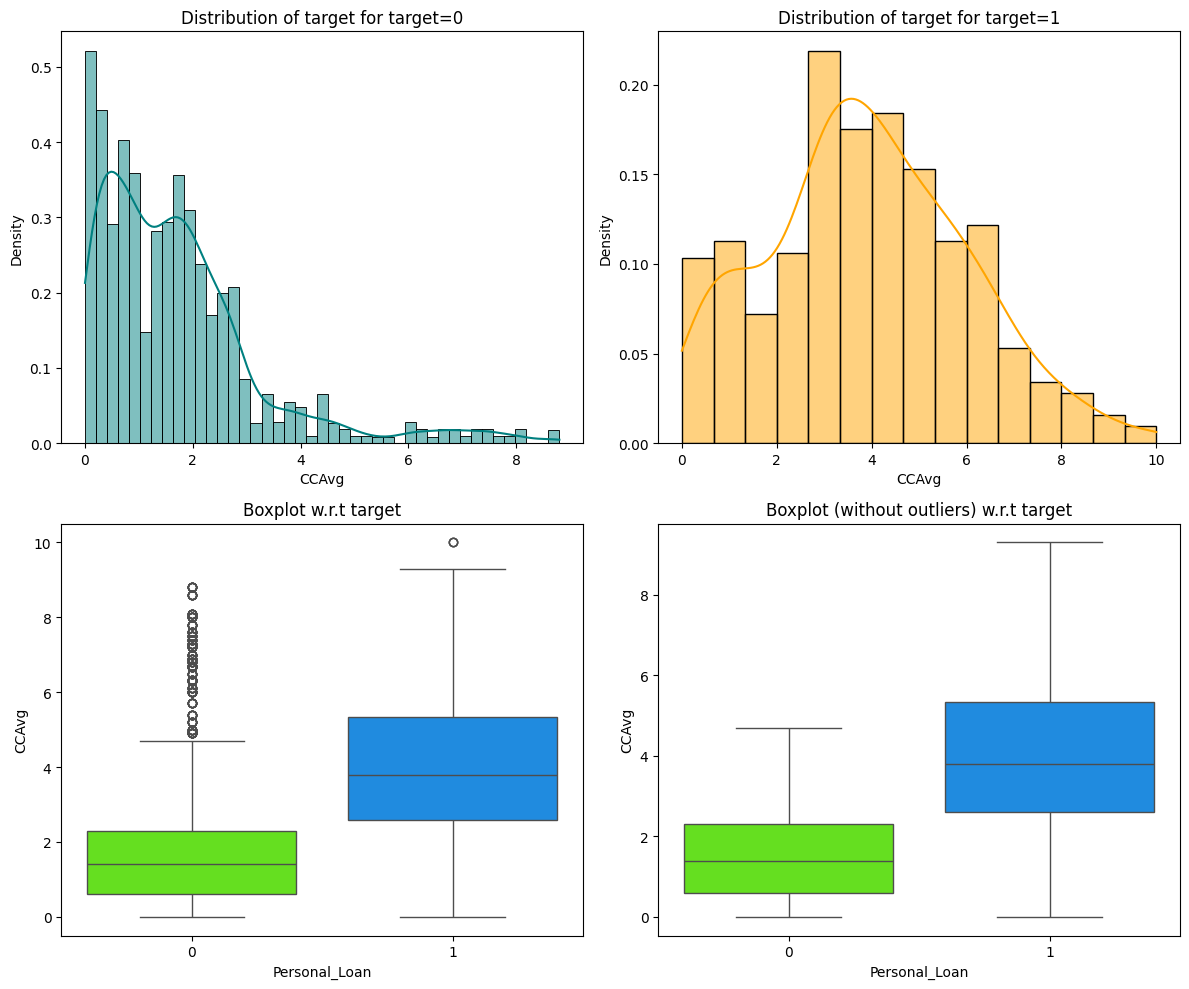

In [43]:
distribution_plot_wrt_target(data, "CCAvg",  "Personal_Loan")

* The histogram is highly positively skewed which indicates presence of outlier
* The box plot shows that 75% of customers that spend an average of 2500 dollars per month purchased personal loans

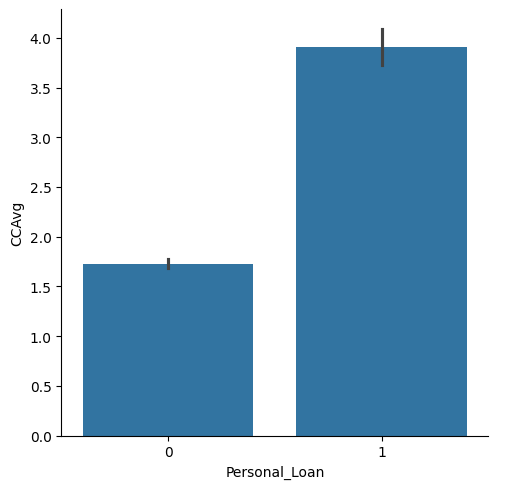

In [44]:
sns.catplot(data=df, x='Personal_Loan', y='CCAvg', kind="bar");

* Customers with over 1,750 dollars monthly average spending on credit cards are highly likely to purchase personal loans.

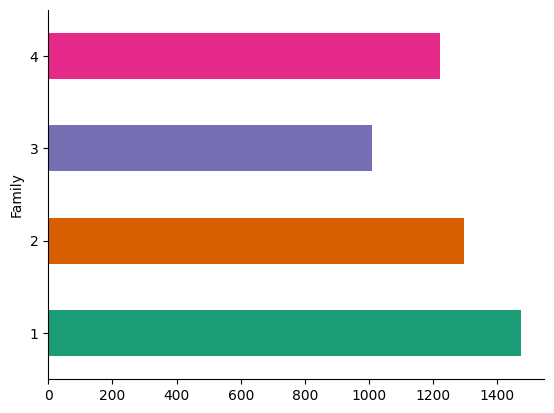

In [45]:
# @Family
data.groupby('Family').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

* Customers with family size of 1 has the most occurrence in the data
* While customers with family size of 3 has the least occurence.

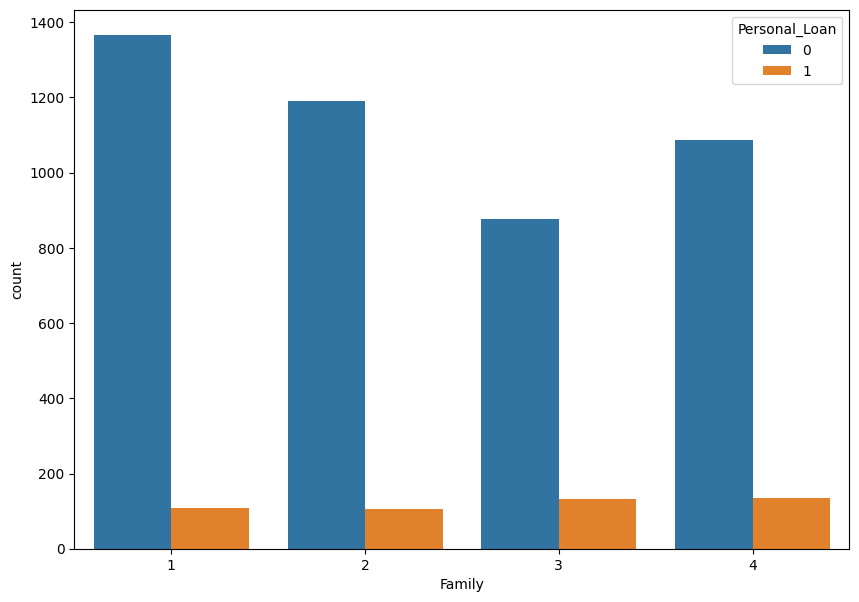

In [46]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Family', hue='Personal_Loan');

* Across all family size, the average number of customers that do not purchase personal loans are similar.

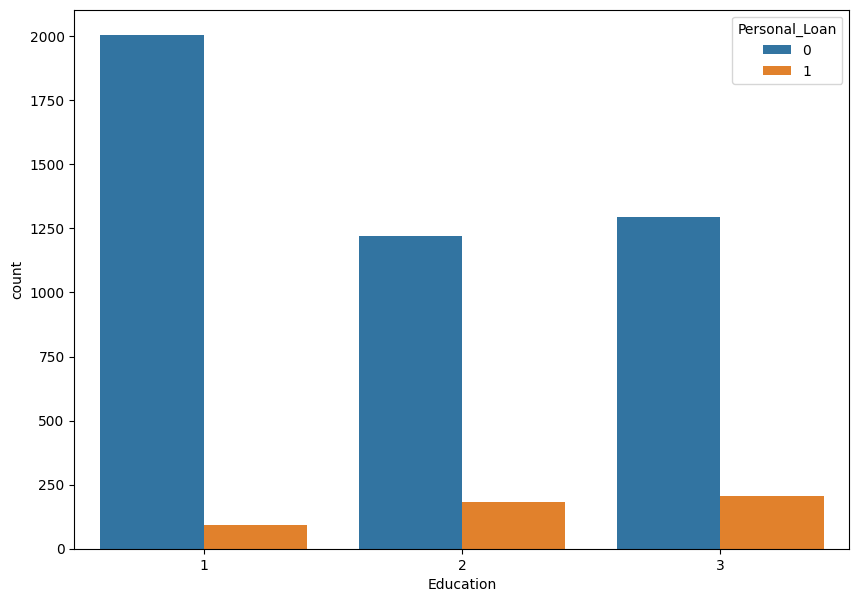

In [47]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Education', hue='Personal_Loan');

* Undergrad customers are less likely to purchase personal loans.

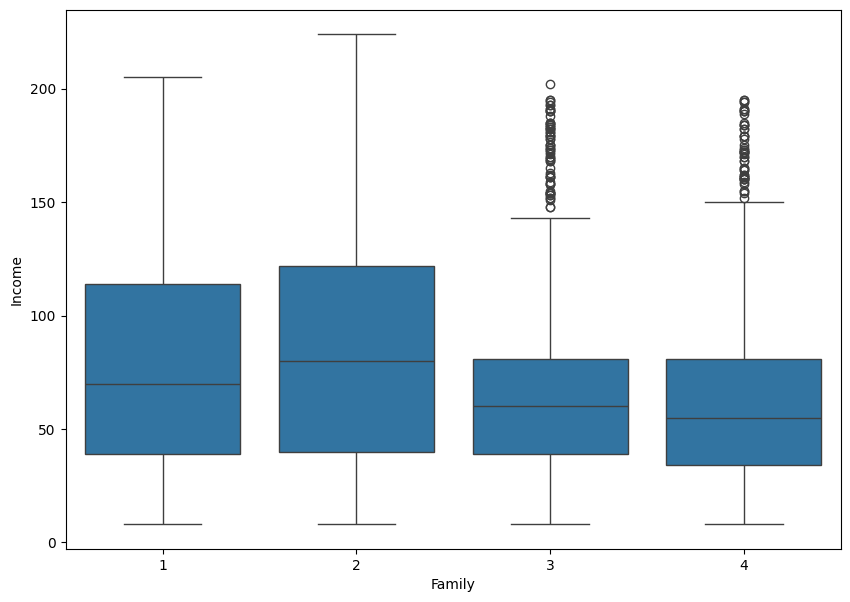

In [48]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x='Family', y='Income');

* The box plot shows that 75% of the Income across all ratings are lower than 85 dollars.
* Outliers are identified in the variable

## Data Preprocessing (contd.)

###  Outlier Detection

#### Let's check for outliers in the data.

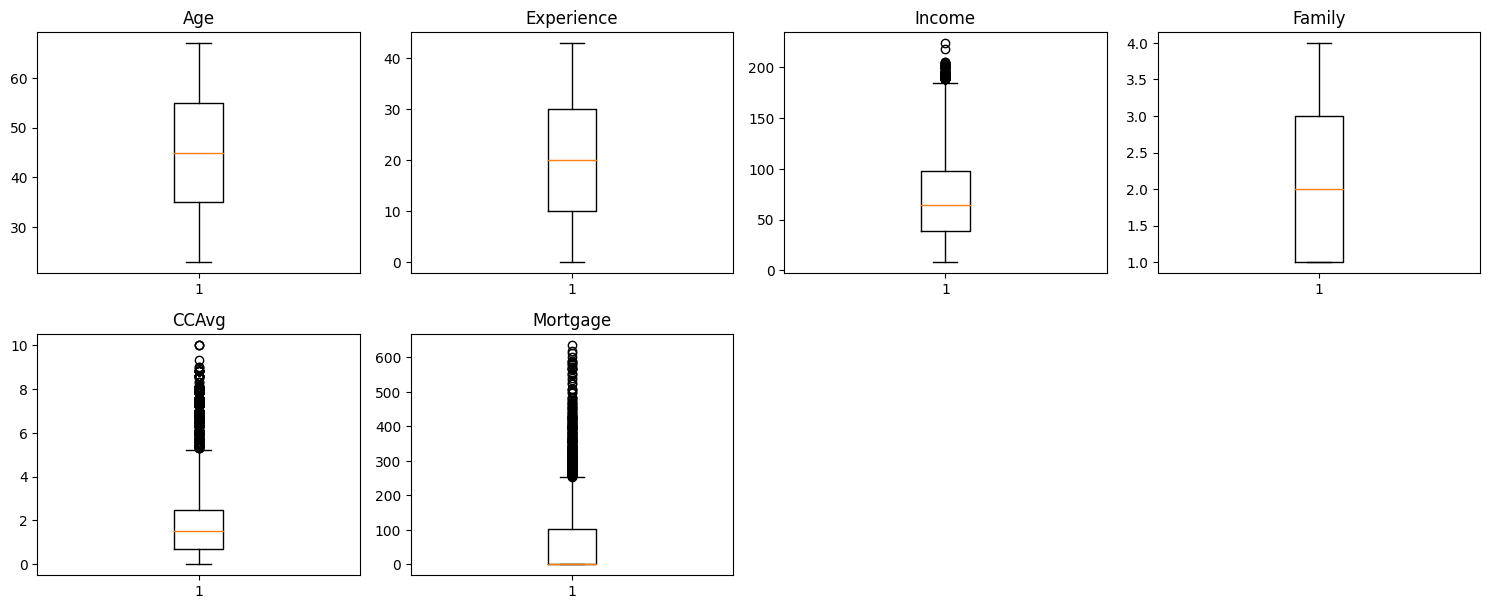

In [49]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are quite a few outliers in the data. Some of the outliers are true values.

In [50]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [51]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Age          0.00000
Experience   0.00000
Income       1.92000
Family       0.00000
CCAvg        6.48000
Mortgage     5.82000
dtype: float64

#### Data Preparation for Modeling

In [52]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91,4,1.60000,1,0,0,1,0,0,0
1,45,19,34,90,3,1.50000,1,0,0,1,0,0,0
2,39,15,11,94,1,1.00000,1,0,0,0,0,0,0
3,35,9,100,94,1,2.70000,2,0,0,0,0,0,0
4,35,8,45,91,4,1.00000,2,0,0,0,0,0,1


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


In [54]:
# dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y #using stratify bcs the data class is imbalanced
)

In [55]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of Test set :  (1500, 17)
Percentage of classes in training set:
0   0.90400
1   0.09600
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0   0.90400
1   0.09600
Name: Personal_Loan, dtype: float64


* We had seen that around 90% of observations belongs to class 0 (No: Personal_Loan) and Around 10% observations belongs to class 1 (Yes: Personal Loan), and this is preserved in the train and test sets

## Model Building

### Model Evaluation Criterion

##### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot confusion matrix.

In [56]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [57]:
# defining a function to show confusion metrics built using sklearn
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### **Decision Tree (Default)**

In [58]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

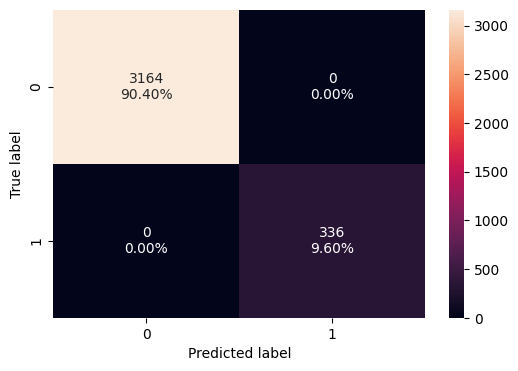

In [59]:
confusion_matrix_sklearn(model, X_train, y_train)

In [60]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


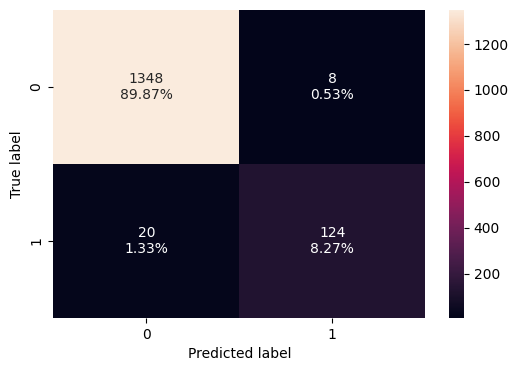

In [61]:
confusion_matrix_sklearn(model, X_test, y_test)

In [62]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.98133,0.86111,0.93939,0.89855


#### Observations
* Model is able to perfectly classify all the data points on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

### **Decision Tree (with class_weights)**

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [63]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

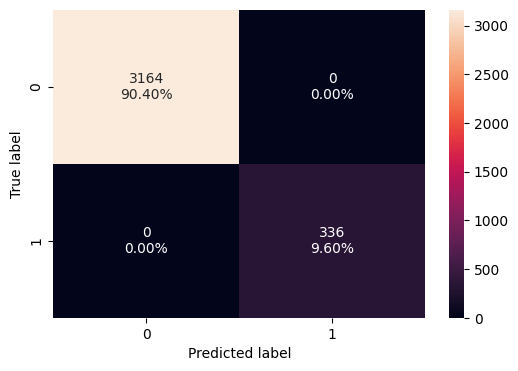

In [64]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [65]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


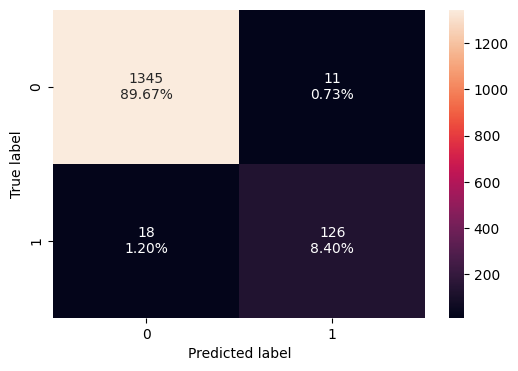

In [66]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [67]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.98067,0.87500,0.91971,0.89680


#### Observations
* Model1 is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* There is a high disparity in performance of model on training set and test set, which suggest that the model is overfitting.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

## **Let's use pruning techniques to try and reduce overfitting.**

### **Decision Tree (Pre-pruning)**

**Using GridSearch for Hyperparameter tuning of our tree model**

In [68]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from (Hyperparameter tuning )
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 1), 
    "max_leaf_nodes": [1,2,3,4,5],     # [50, 75, 150, 250]
    "min_samples_split": [65, 68, 70, 72, 74],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search (Grid search is a tuning technique to compute the optimum values of hyperparameters.)
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5) 
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=4,
                       min_samples_split=65, random_state=1)

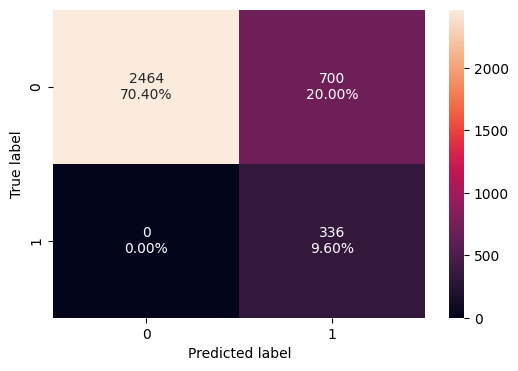

In [69]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [70]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.80000,1.00000,0.32432,0.48980


**Checking performance on test data**

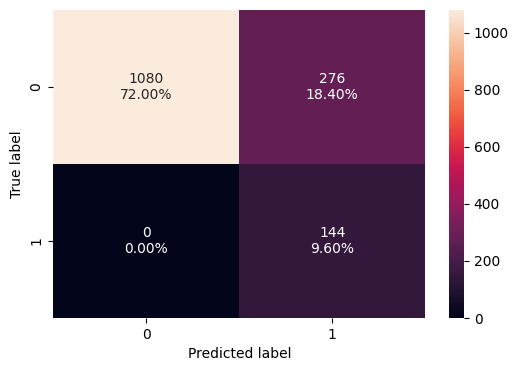

In [71]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [72]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.81600,1.00000,0.34286,0.51064


* The model is giving a generalized result now since the recall scores on both the train and test data are identical which shows that the model is able to generalize well on unseen data

In [73]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

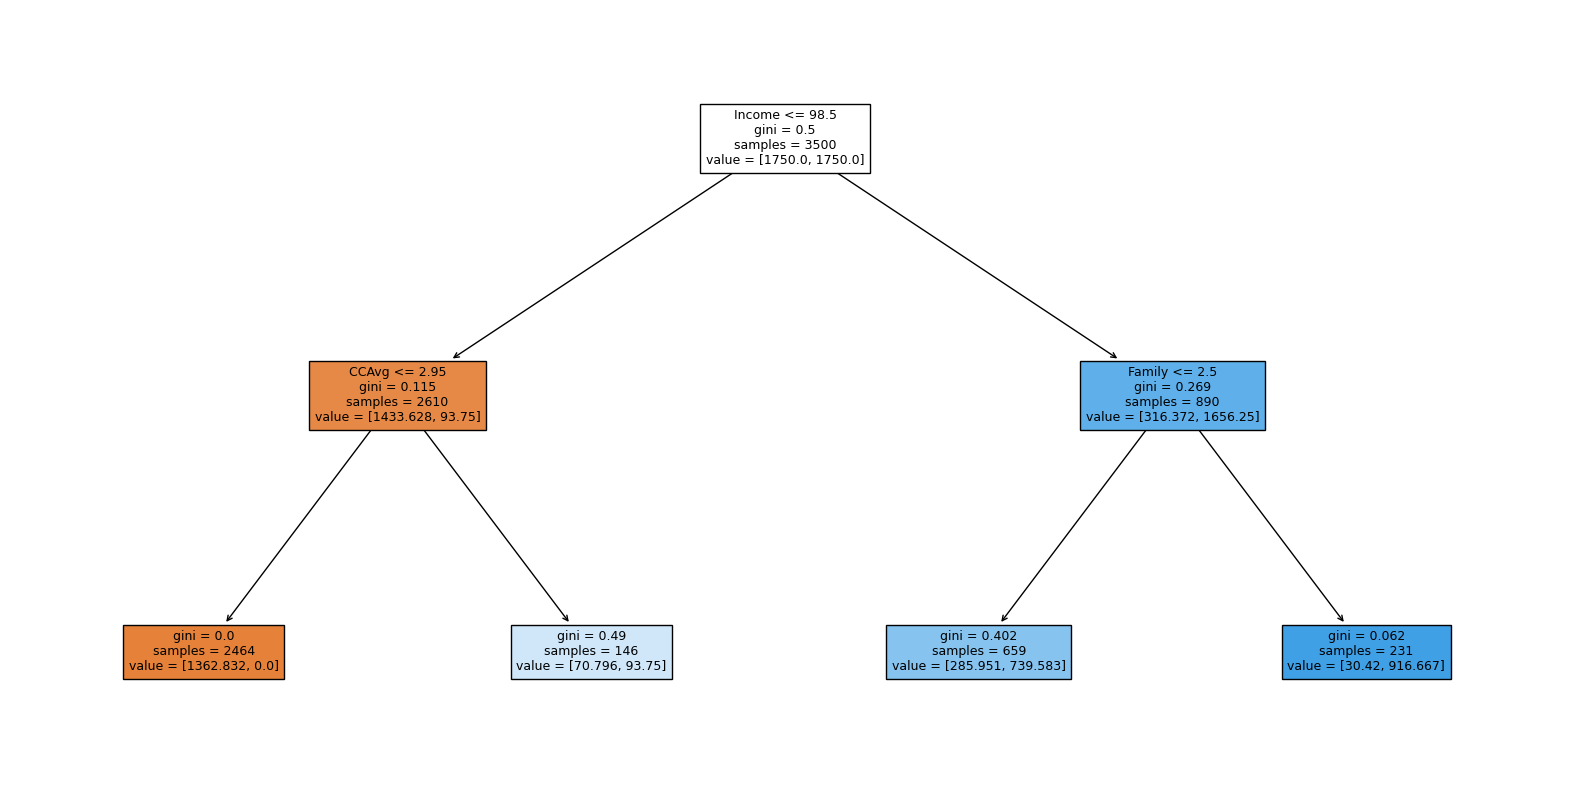

In [74]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [75]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1362.83, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [70.80, 93.75] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- weights: [285.95, 739.58] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [30.42, 916.67] class: 1



**Observations from the pre-pruned tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:
* If the Income is less than or equal to 98.50 and CCAvg is less than or equal to 2.95, the customer will likely not purchase a personal loan.

Interpretation from other decision rules can be made similarly

In [76]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                       Imp
Income             0.87040
CCAvg              0.07956
Family             0.05003
Age                0.00000
ZIPCode_92         0.00000
Education_2        0.00000
ZIPCode_96         0.00000
ZIPCode_95         0.00000
ZIPCode_94         0.00000
ZIPCode_93         0.00000
CreditCard         0.00000
ZIPCode_91         0.00000
Online             0.00000
CD_Account         0.00000
Securities_Account 0.00000
Mortgage           0.00000
Education_3        0.00000


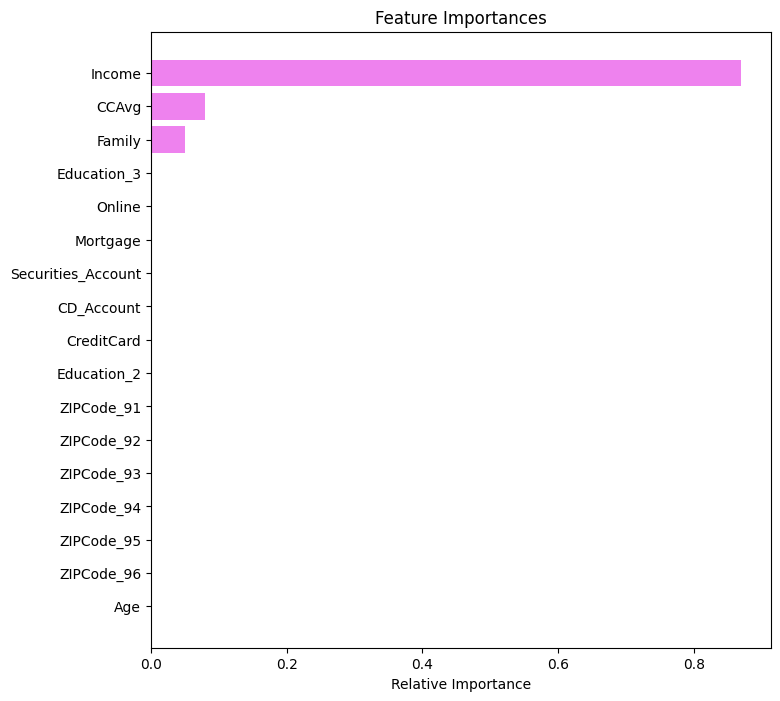

In [77]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre tuned decision tree, Income, CCAvg, and Family are the top 3 most important features respectively.

### **Decision Tree (Post pruning)**

#### Cost-Complexity Pruning

In [78]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced") # {0: 0.15, 1: 0.85}
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [79]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,-0.00000
1,0.00000,-0.00000
2,0.00000,-0.00000
3,0.00000,-0.00000
4,0.00000,-0.00000
5,0.00000,-0.00000
6,0.00000,-0.00000
7,0.00000,0.00000
8,0.00000,0.00000
9,0.00015,0.00031


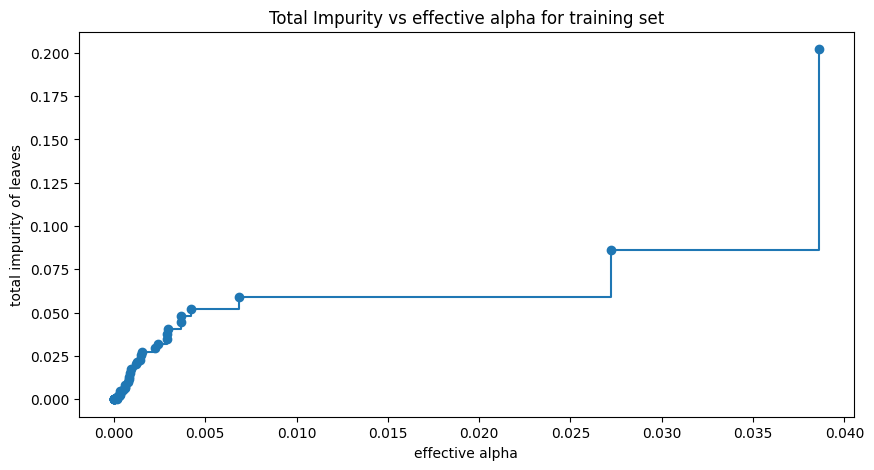

In [80]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [81]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29792729936894546


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

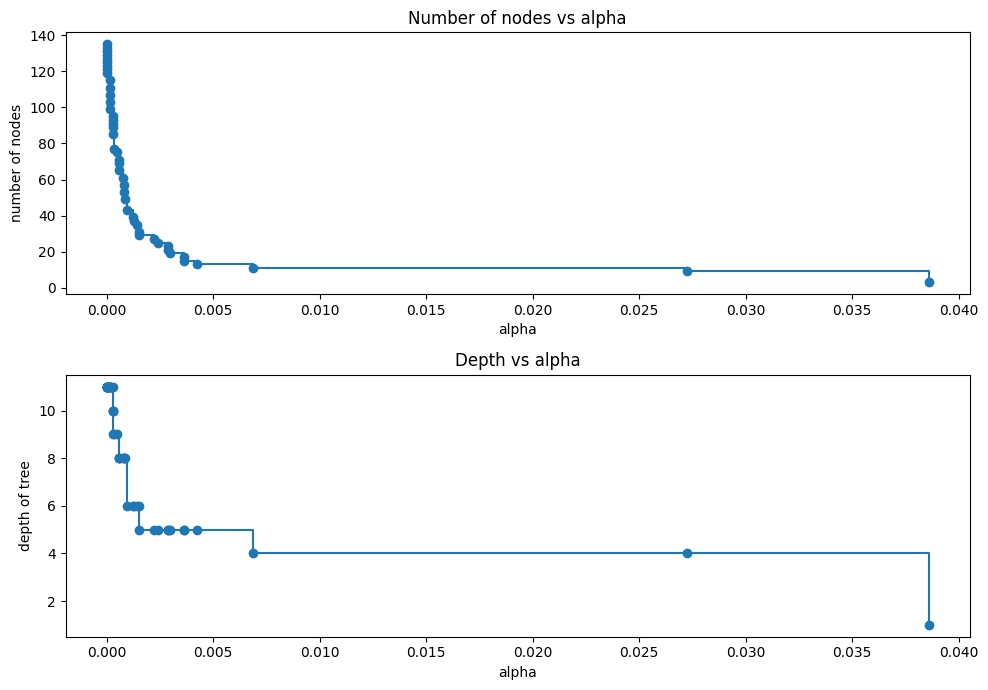

In [82]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and testing sets**

In [83]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)
    
    
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [84]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

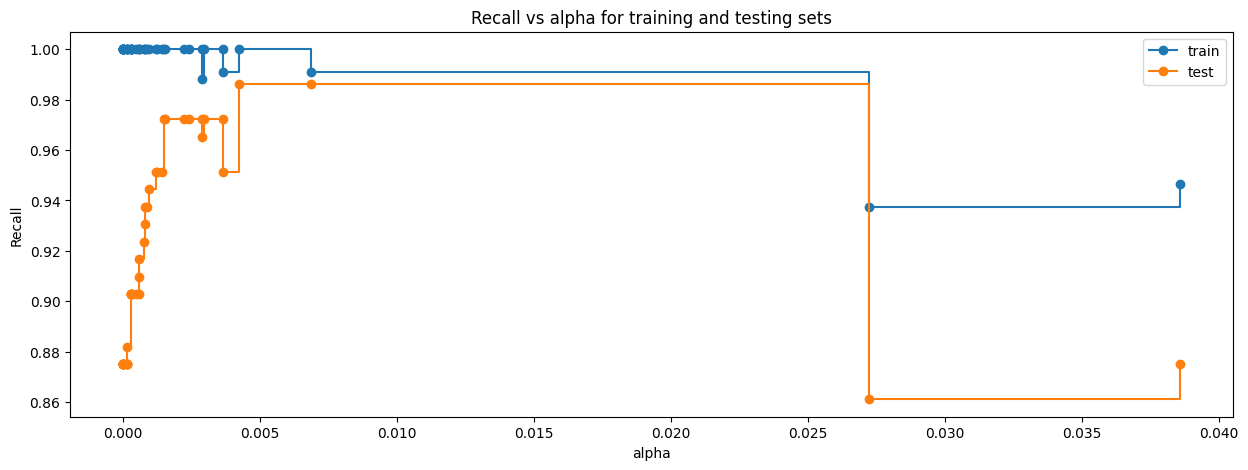

In [85]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [86]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.004240658160900031, class_weight='balanced',
                       random_state=1)


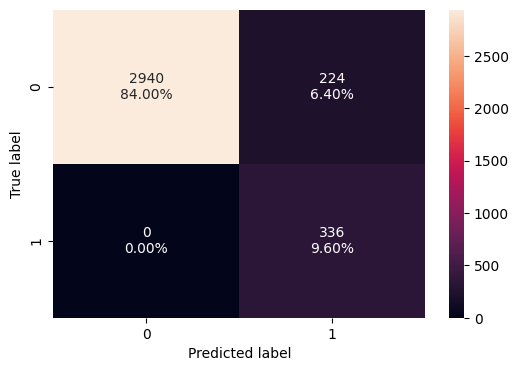

In [87]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [88]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.93600,1.00000,0.60000,0.75000


**Checking performance on test data**

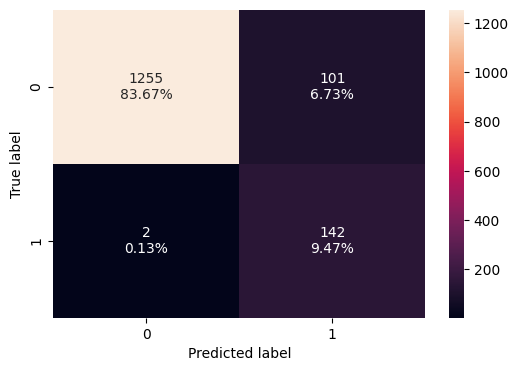

In [89]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [90]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.93133,0.98611,0.58436,0.73385


* In the post-prunned tree also, the model is able to perfectly classify the False Negative (FN) data points on the training set.
* There is a little difference in performance of the model on train set and test set, suggesting that the model is generating well on unseen data.

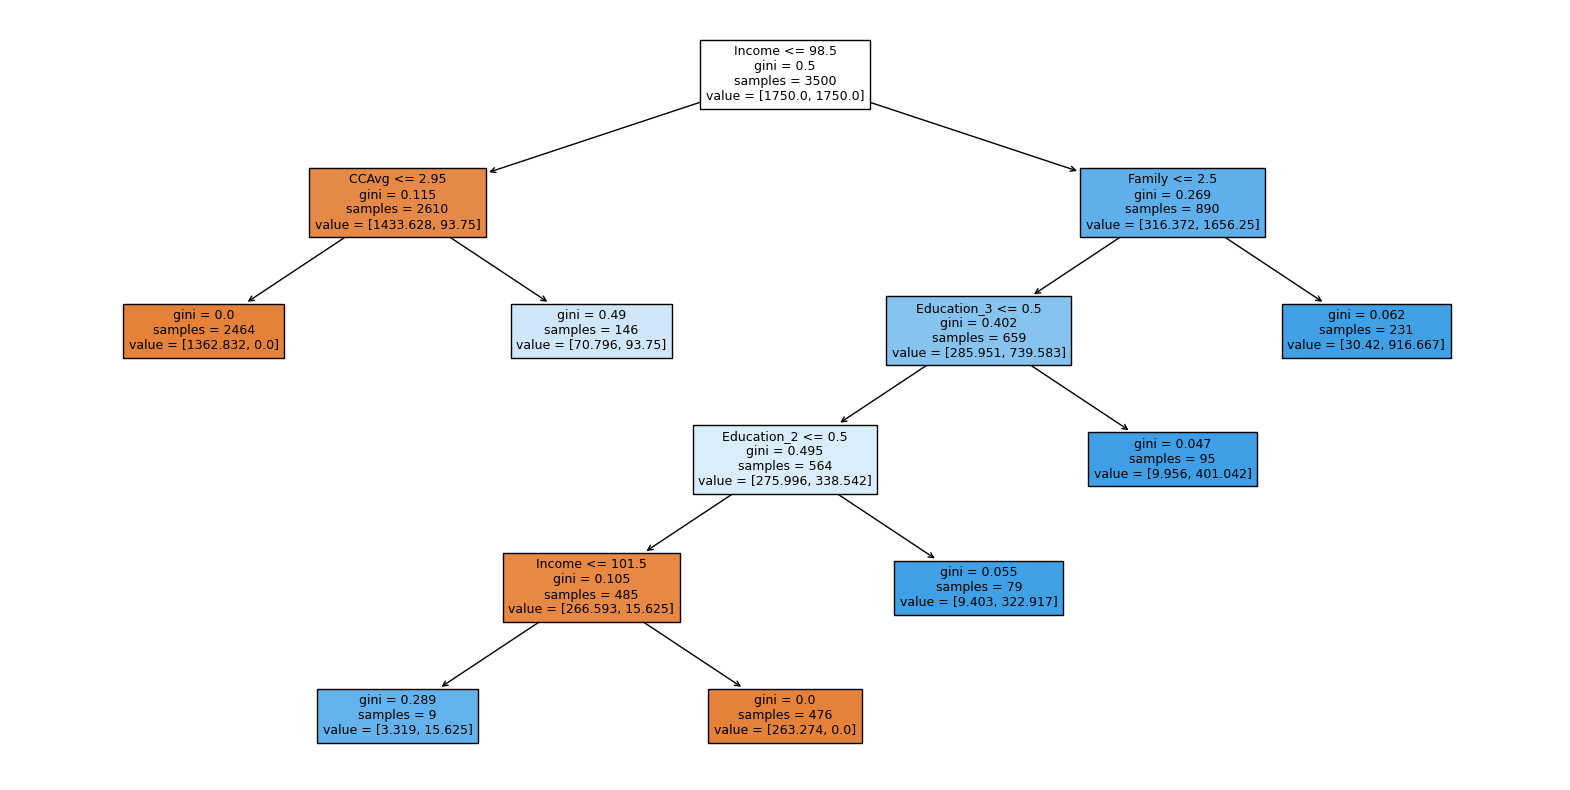

In [91]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [92]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))


|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1362.83, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [70.80, 93.75] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 101.50
|   |   |   |   |   |--- weights: [3.32, 15.62] class: 1
|   |   |   |   |--- Income >  101.50
|   |   |   |   |   |--- weights: [263.27, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [9.40, 322.92] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [9.96, 401.04] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [30.42, 916.67] class: 1



* We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

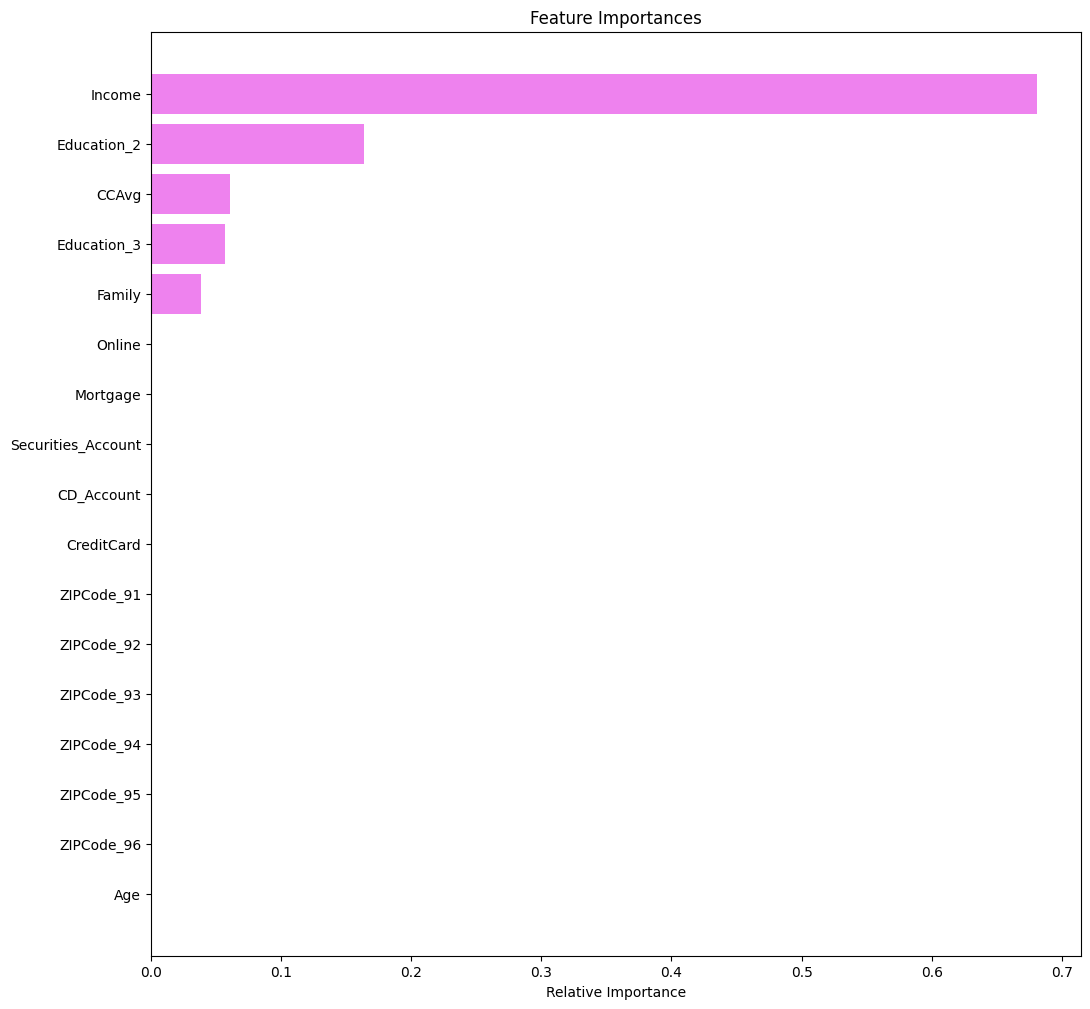

In [93]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income, Education, CCAvg, and Family are the most important features for the post pruned tree

## Model Comparison and Final Model Selection

In [94]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.00000,1.00000,0.80000,0.93600
Recall,1.00000,1.00000,1.00000,1.00000
Precision,1.00000,1.00000,0.32432,0.60000
F1,1.00000,1.00000,0.48980,0.75000


In [95]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.98133,0.98067,0.81600,0.93133
Recall,0.86111,0.87500,1.00000,0.98611
Precision,0.93939,0.91971,0.34286,0.58436
F1,0.89855,0.89680,0.51064,0.73385


* The Pre-pruned Decision tree models has the highest `recall` scores on both training and test sets.
* We will choose the pre pruned tree model as the best model since our objective is to maximize `recall`. The greater the recall, the higher the chances of minimizing false negatives.

## Actionable Insights and Business Recommendations


* The model built can be used to predict if a liability customer will buy personal loan or not and can correctly identify 100% of the prospective personal loan customers

* In the pre tuned decision tree, are the top 3 most important features respectively.

* Income, CCAvg, and Family  (in that order) are the most important variables in determining if a liability customer will buy personal loan or not.

* Liability customers with income greater than to 98.5 and has atleast a Graduate education should be our target customers. 
* Customers with average monthly credit card spending of less than 2.95 (in thousand dollars) and income less than or equal to 98.5 will most likely not buy personal loan.

**Criteria to buy personal loan according to decision tree model should depend on four main factor - Income, Family, Education, CCAvg that is:**
* If the income is less than or equals to 98.50 and the average monthly credit card spending is greater than 2.95 (in thousand dollars), the customer will purchase personal loan.
* Undergraduate customers with income between 98.5 and 101.5 and has less than 3 family members will buy personal loan. 
* While undergraduate that makes more than 101.5 income and has a family less than 3 family members will not buy personal loan.
* Undergraduates with income greater than 98.5 and has over 2 family members will buy personal loan. 
* The company should provide more data for the analysis to get more reliable results. 41.9% of the total records are undergraduates.

___